In [7]:
import os, glob
from datetime import date, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from funcs import io
from importlib import reload

In [8]:
folder = os.path.join('..','data')
activities = io.load_dataset(folder, which='last', activity_type='Run')

# Extract data for marathons

Assume that the training lasted 16 weeks.

In [11]:
reload(io)

<module 'funcs.io' from 'C:\\Users\\nicol\\Dropbox\\strava_analysis\\code\\funcs\\io.py'>

In [12]:
marathon_dates = [
    date(2022, 5, 8),
    date(2023, 3, 19)
]
training_time = 16 # in weeks

In [13]:
marathons = io.extract_marathons(marathon_dates, training_time, activities)

2022-05-08
2023-03-19


In [14]:
marathons.head()

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,location_country,kudos_count,...,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,has_kudoed,suffer_score,date,days2race,year
0,Zurich Marató Barcelona,42551.8,11210,11210,145.0,Run,Run,2022-05-08T06:02:30Z,Spain,7,...,True,176.0,194.0,65.6,10.4,False,588.0,2022-05-08,0 days,2022
1,Evening Run,6062.0,1646,1646,53.0,Run,Run,2022-05-07T16:42:00Z,Spain,1,...,True,163.8,183.0,98.0,63.8,False,46.0,2022-05-07,-1 days,2022
2,Evening Run,10050.5,2841,2847,70.0,Run,Run,2022-05-05T16:46:00Z,Spain,1,...,True,163.8,181.0,102.8,65.8,False,80.0,2022-05-05,-3 days,2022
3,Evening Run,16143.5,4526,4526,110.0,Run,Run,2022-05-02T17:02:01Z,Spain,3,...,True,159.8,172.0,124.6,65.2,False,114.0,2022-05-02,-6 days,2022
4,Evening Run,11208.1,3114,3120,52.0,Run,Run,2022-04-28T17:42:01Z,Spain,1,...,True,157.0,174.0,114.8,64.8,False,70.0,2022-04-28,-10 days,2022


# Analysis

First, we are going to check some overall statistics, including the total number of training sessions.

We also going to plot the distance, time, and elevation accumulated over all the training sessions.

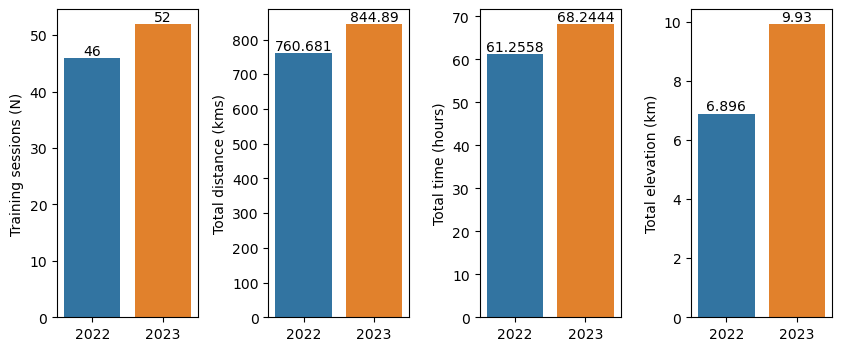

In [15]:
fig, ax = plt.subplots(1,4, figsize=(10,4))
fig.subplots_adjust(wspace=0.5)

sns.barplot(
    data = marathons,
    x = marathons.year.unique(), 
    y = marathons.groupby(['year'])['distance'].count(),
    ax = ax[0]
)
ax[0].set_ylabel('Training sessions (N)')

sns.barplot(
    data = marathons,
    x = marathons.year.unique(), 
    y = marathons.groupby(['year'])['distance'].sum()/1000,
    ax = ax[1]
)
ax[1].set_ylabel('Total distance (kms)')

sns.barplot(
    data = marathons,
    x = marathons.year.unique(), 
    y = marathons.groupby(['year'])['elapsed_time'].sum()/60/60,
    ax = ax[2]
)
ax[2].set_ylabel('Total time (hours)')

sns.barplot(
    data = marathons,
    x = marathons.year.unique(), 
    y = marathons.groupby(['year'])['total_elevation_gain'].sum()/1000,
    ax = ax[3]
)
ax[3].set_ylabel('Total elevation (km)')

# visualize overall numbers
for a in ax:
    for i in a.containers:
        a.bar_label(i,)


From this, it looks like in 2023 I trained more than 2022, and accumulated more elevation gain.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure() #create overall container

ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure

dday = date(*[int(d) for d in marathon2022_training.start_date.max()[:10].split('-')])
ds = [ date(*[int(ymd) for ymd in date_str[:10].split('-')]) for date_str in marathon2022_training.start_date ]
x = np.asarray([ str(d-dday).split(',')[0] for d in ds ] )  #convert data to numpy array
for i in range(len(x)):
    if ':' in x[i]:
        x[i] = 0
    else:
        x[i] = int(x[i][:3])
x = x.astype(int)
y = np.asarray(marathon2022_training.average_speed)
ax1.plot(x[::-1], y[::-1], '-o') #plot data points in scatter plot on ax1

dday = date(*[int(d) for d in marathon2023_training.start_date.max()[:10].split('-')])
ds = [ date(*[int(ymd) for ymd in date_str[:10].split('-')]) for date_str in marathon2023_training.start_date ]
x = np.asarray([ str(d-dday).split(',')[0] for d in ds ] )  #convert data to numpy array
for i in range(len(x)):
    if ':' in x[i]:
        x[i] = 0
    else:
        x[i] = int(x[i][:3])
x = x.astype(int)
y = np.asarray(marathon2023_training.average_speed)
ax1.plot(x[::-1], y[::-1],'-o') #plot data points in scatter plot on ax1

ax1.set_title('Average Speed over Time')
fig.autofmt_xdate(rotation=45)
#ax1.set_ylim([0,5])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure() #create overall container

ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure

dday = date(*[int(d) for d in marathon2022_training.start_date.max()[:10].split('-')])
ds = [ date(*[int(ymd) for ymd in date_str[:10].split('-')]) for date_str in marathon2022_training.start_date ]
x = np.asarray([ str(d-dday).split(',')[0] for d in ds ] )  #convert data to numpy array
for i in range(len(x)):
    if ':' in x[i]:
        x[i] = 0
    else:
        x[i] = int(x[i][:3])
x = x.astype(int)
y = np.asarray(marathon2022_training.distance/1000)
ax1.plot(x[::-1], y[::-1], '-o') #plot data points in scatter plot on ax1

dday = date(*[int(d) for d in marathon2023_training.start_date.max()[:10].split('-')])
ds = [ date(*[int(ymd) for ymd in date_str[:10].split('-')]) for date_str in marathon2023_training.start_date ]
x = np.asarray([ str(d-dday).split(',')[0] for d in ds ] )  #convert data to numpy array
for i in range(len(x)):
    if ':' in x[i]:
        x[i] = 0
    else:
        x[i] = int(x[i][:3])
x = x.astype(int)
y = np.asarray(marathon2023_training.distance/1000)
ax1.plot(x[::-1], y[::-1],'-o') #plot data points in scatter plot on ax1

ax1.set_title('Distance over Time')
fig.autofmt_xdate(rotation=45)
#ax1.set_ylim([0,5])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure() #create overall container

ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure

dday = date(*[int(d) for d in marathon2022_training.start_date.max()[:10].split('-')])
ds = [ date(*[int(ymd) for ymd in date_str[:10].split('-')]) for date_str in marathon2022_training.start_date ]
x = np.asarray([ str(d-dday).split(',')[0] for d in ds ] )  #convert data to numpy array
for i in range(len(x)):
    if ':' in x[i]:
        x[i] = 0
    else:
        x[i] = int(x[i][:3])
x = x.astype(int)
y = np.asarray(marathon2022_training.elapsed_time/60/60)
ax1.plot(x[::-1], y[::-1], '-o') #plot data points in scatter plot on ax1

dday = date(*[int(d) for d in marathon2023_training.start_date.max()[:10].split('-')])
ds = [ date(*[int(ymd) for ymd in date_str[:10].split('-')]) for date_str in marathon2023_training.start_date ]
x = np.asarray([ str(d-dday).split(',')[0] for d in ds ] )  #convert data to numpy array
for i in range(len(x)):
    if ':' in x[i]:
        x[i] = 0
    else:
        x[i] = int(x[i][:3])
x = x.astype(int)
y = np.asarray(marathon2023_training.elapsed_time/60/60)
ax1.plot(x[::-1], y[::-1],'-o') #plot data points in scatter plot on ax1

ax1.set_title('Elapsed time over Time')
fig.autofmt_xdate(rotation=45)
#ax1.set_ylim([0,5])